# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
•	без подписки 
o	абонентская плата отсутствует;
o	стоимость одной минуты поездки — 8 рублей;
o	стоимость старта (начала поездки) — 50 рублей;
•	с подпиской Ultra 
o	абонентская плата — 199 рублей в месяц;
o	стоимость одной минуты поездки — 6 рублей;
o	стоимость старта — бесплатно.
Описание данных  
В основных данных есть информация о пользователях, их поездках и подписках.


Пользователи — users_go.csv  
user_id	уникальный идентификатор пользователя
name	имя пользователя
age	возраст
city	город
subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv  
user_id	уникальный идентификатор пользователя
distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date	дата совершения поездки

Подписки — subscriptions_go.csv  
subscription_type	тип подписки
minute_price	стоимость одной минуты поездки по данной подписке
start_ride_price	стоимость начала поездки
subscription_fee	стоимость ежемесячного платежа


#### Шаг 1. Загрузка данных

<div class="alert alert-block alert-info">
<b>🔄Комментарий № 1 студента :</b>   
Здесь и далее по требованию Яндекс-Практикум УДАЛЕНЫ замечания ревьюера.  

Учтены замечания ревьюера! ✔
</div>

In [1]:
#импорт всех библиотек в одной ячейке
import pandas as pd
import numpy as np 
from scipy import stats as st
#from scipy.stats import binom
from math import sqrt
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from scipy.stats import binom, norm

1.1 Считайте CSV-файлы с данными с помощью библиотеки Pandas и сохраните их в датафреймы. Пути к файлам:
•	/datasets/users_go.csv
•	/datasets/rides_go.csv
•	/datasets/subscriptions_go.csv

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

<div class="alert alert-block alert-info">
<b>🔄Комментарий № 1 студента :</b> 
Учтены замечания ревьюера - убираем Print ✔
</div>

In [3]:
#print(users_go.head(5) )
users_go.info()
users_go.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides_go.info()
rides_go.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
#print(subscriptions_go.head(2) )
subscriptions_go.info()
subscriptions_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-block alert-info">
<b>🔄Вывод 1:</b> 
Все данные загружены, некоторые столбцы содержат дату как Object. ✔
</div>

#### Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты Pandas.  

In [6]:
rides_go['date']= rides_go['date'].astype('datetime64')

2.2 Создайте новый столбец с номером месяца на основе столбца date.  

In [7]:
rides_go['ride_month'] =pd.DatetimeIndex(rides_go['date']).month 
print(rides_go.head(5) )
rides_go.info()

   user_id     distance   duration       date  ride_month
0        1  4409.919140  25.599769 2021-01-01           1
1        1  2617.592153  15.816871 2021-01-18           1
2        1   754.159807   6.232113 2021-04-20           4
3        1  2694.783254  18.511000 2021-08-11           8
4        1  4028.687306  26.265803 2021-08-28           8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   ride_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


<div class="alert alert-block alert-info">
<b>🔄Комментарий № 2 студента :</b> 
Учтены замечания ревьюера! ✔
</div>

In [8]:
#данные за какой период у нас имеются 
rides_go['date'].min(),rides_go['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [9]:
#Пропущенные есть?
print(users_go.isna().sum()) 
print(rides_go.isna().sum()) 
print(subscriptions_go.isna().sum()) 
print('\n Дубликаты:')
print('users_go', users_go.duplicated().sum())  #Было 1565 строк
print('rides_go', rides_go.duplicated().sum()) 
print('subscriptions_go', subscriptions_go.duplicated().sum()) 
users_go = users_go.drop_duplicates().reset_index(drop=True) 
#print('users_go', users_go.duplicated().sum())  #Было 1565 строк
#print(users_go) #Стало 1534
users_go

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id       0
distance      0
duration      0
date          0
ride_month    0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

 Дубликаты:
users_go 31
rides_go 0
subscriptions_go 0


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


<div class="alert alert-block alert-info">
<b>🔄Вывод 2:</b> 
Все данные загружены, типы столбцов преобразованы. Проверено наличие пропущенных значений (их нет) и дубликатов в датафреймах (31 дубликат найден и удален).
</div>

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:  
3.1 частота встречаемости городов;

In [10]:
display(users_go.city.unique() )
#users_go.city.hist(figsize = (10,8)); #orientation='horizontal'

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

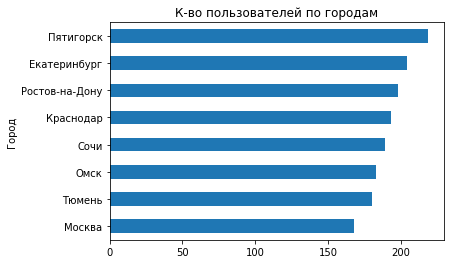

In [11]:
#Учтен комментарий ревьюера на красном фоне
ug_pt1 = users_go.groupby('city')['city'].count().sort_values(ascending=True)
ug_pt1.plot(kind='barh',title="К-во пользователей по городам",xlabel="Город",ylabel="К-во")
plt.show()

3.2 соотношение пользователей с подпиской и без подписки;


                   name
subscription_type      
free                835
ultra               699


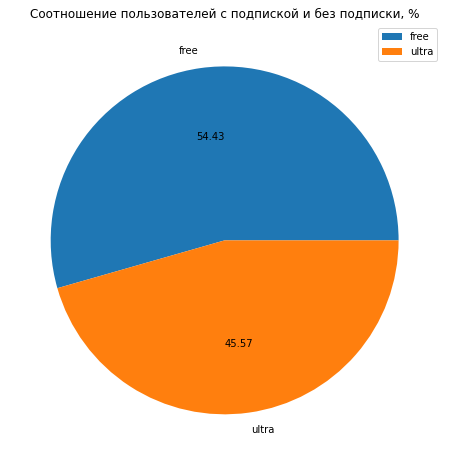

In [12]:
##Учтен комментарий ревьюера на желтом фоне
us_go_pt1=users_go.pivot_table(index=['subscription_type'], values='name', aggfunc='count')#.reset_index(True) 
#pivot_table(index=['category_name', 'subcategory_name'], columns='source', values='visits', aggfunc='sum')
us_go_pt1=us_go_pt1.rename({"name":"total"}) #не работает
print(us_go_pt1)
us_go_pt1.plot(kind='pie',title ="Cоотношение пользователей с подпиской и без подписки, %", y='name',ylabel="",autopct='%.2f',figsize=(8, 8));

3.3 возраст пользователей;

24.903520208604956

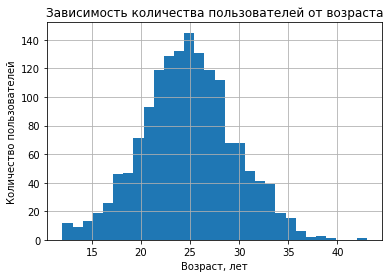

In [13]:
plt.xlabel("Возраст, лет")
plt.ylabel("Количество пользователей")
plt.title("Зависимость количества пользователей от возраста")
users_go.age.hist(bins=30)
users_go.age.mean()

3.4 расстояние, которое пользователь преодолел за одну поездку;

3070.6599756818814

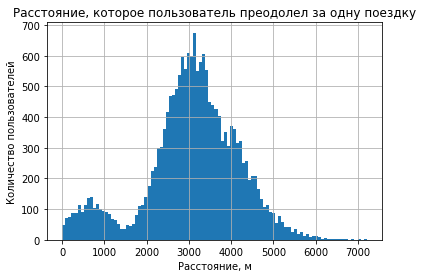

In [14]:
#Учтен комментарий ревьюера на красном фоне
#rides_go_pt1=rides_go.pivot_table(index=['user_id'], values='distance', aggfunc='mean')
#print(rides_go_pt1)
#rides_go_pt1.hist();
plt.xlabel("Расстояние, м")
plt.ylabel("Количество пользователей")
plt.title("Расстояние, которое пользователь преодолел за одну поездку")
rides_go.distance.hist(bins=100);
rides_go.distance.mean()

3.5 продолжительность поездок.

17.80501119798444

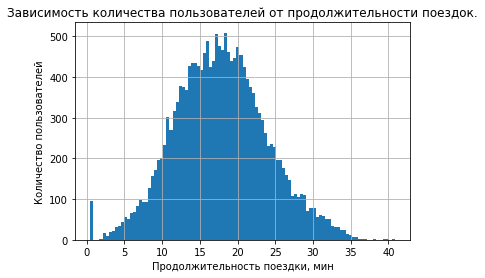

In [15]:
##Учтен комментарий ревьюера на красном фоне
#rides_go_pt2=rides_go.pivot_table(index=['user_id'], values='duration', aggfunc='mean')
#print(rides_go_pt2)
#rides_go_pt2.hist();
plt.xlabel("Продолжительность поездки, мин")
plt.ylabel("Количество пользователей")
plt.title("Зависимость количества пользователей от продолжительности поездок.")
rides_go['duration'].hist(bins=100)
rides_go.duration.mean()

<div class="alert alert-block alert-info">
<b>🔄Вывод 3:</b>  
    
1) Самое маленькое количество пользователей сервиса в Москве, видимо, из-за конкурентов.  
    
2) 54% пользователей - без подписки (free).  

3) Распределение возрастов -"нормальное". Пик на графике практически совпадает с медианой - 25 лет.
    
4) Дистанции, которые пользователь преодолел за 1 поездку, имеют 2 максимума -в малом и среднем диапазоне (видимо, слишком разные по масштабам города попали в исследование). Медиана 3070 м на графике практически совпадает с пиком в среднем диапазоне. 
    
5) Продолжительность поездок имеет всплеск (выброс) около 0 минут, видимо, связанный с техническими неисправностями самоката СРАЗУ при начале движения. Медиана (17 минут) на графике практически совпадает с пиком в среднем диапазоне.
</div>

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [16]:
big_df1=users_go.merge(rides_go, on='user_id', how='inner') #если left, то то же самое 
big_df2=big_df1.merge(subscriptions_go, on='subscription_type', how='inner') #если left, то то же самое -18068 строк
big_df2

,user_id,name,age,city,subscription_type,distance,duration,date,ride_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [17]:
#Учтен комментарий ревьюера на желтом фоне
len (big_df2) #18068 - ничего не потеряли

18068

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:  
•	c данными о пользователях без подписки;   
•	с данными о пользователях с подпиской.


In [18]:
df_users_free=big_df2.query('subscription_type=="free"')
print('Данные о пользователях без подписки:',len(df_users_free))

Данные о пользователях без подписки: 11568


In [19]:
df_users_ultra=big_df2.query('subscription_type=="ultra"')
print('Данные о пользователях с подпиской:',len(df_users_ultra))
print('ВСЕГО данных о пользователях:',len(df_users_free)+len(df_users_ultra))


Данные о пользователях с подпиской: 6500
ВСЕГО данных о пользователях: 18068


4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [20]:
#Учтен комментарий ревьюера на желтом фоне
#df_users_free_pt1=df_users_free.pivot_table(index=['user_id'], values='distance', aggfunc='mean')
#print(df_users_free_pt1)
#df_users_free_pt1.hist();
#plt.title("Данные о пользователях")
#df_users_free.distance.hist();

Данные о пользователях:

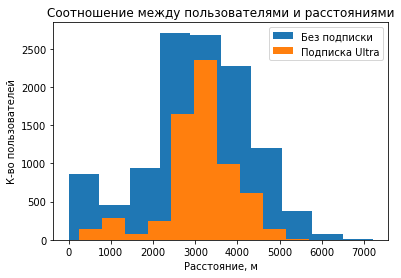

In [21]:
#Учтен комментарий ревьюера на желтом фоне НИЖЕ
#df_users_ultra_pt1=df_users_ultra.pivot_table(index=['user_id'], values='distance', aggfunc='mean')
#print(df_users_ultra_pt1)
#df_users_ultra_pt1.hist();
fig, ax = plt.subplots(1, 1)
ax.hist(df_users_free['distance'],label="Без подписки" )
ax.hist(df_users_ultra['distance'],label="Подписка Ultra" )
#df_users_ultra.distance.hist();
ax.set_title('Соотношение между пользователями и расстояниями')
ax.set_xlabel('Расстояние, м')
ax.set_ylabel('К-во пользователей')
ax.legend()
#plt.figure() 
plt.show()

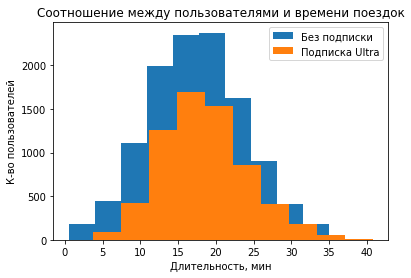

In [22]:
#Учтен комментарий ревьюера на красном фоне ВЫШЕ
fig, ax = plt.subplots(1, 1)
ax.hist(df_users_free['duration'],label="Без подписки" )
ax.hist(df_users_ultra['duration'],label="Подписка Ultra" )
#df_users_ultra.distance.hist();
ax.set_title('Соотношение между пользователями и времени поездок')
ax.set_xlabel('Длительность, мин')
ax.set_ylabel('К-во пользователей')
ax.legend()
#plt.figure() 
plt.show()

<div class="alert alert-block alert-info">
<b>🔄Вывод 4:</b>  
    
1) Объединили данные о пользователях, поездках и подписках в один датафрейм. 

2) Создайли ещё два датафрейма из датафрейма, созданного на этапе 1: c данными о пользователях без подписки и с данными о пользователях с подпиской.  
    
3) Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий. **Видно, что пользователи без подписки ездят в среднем на бОльшие расстояния.**
</div>

#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [23]:
#big_df3=big_df2.pivot_table(index=['user_id','ride_month'], values=['distance','duration'], aggfunc=['sum','count']).reset_index()
#If you want to coalesce the multi-index into a single string index without caring about the index level order,
#you can simply map a join function over the columns, and assign the result list back:
#https://stackoverflow.com/questions/42099024/pandas-pivot-table-rename-columns
#big_df3.columns = list(map("_".join, big_df3.columns)) #
#big_df3.head()

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [24]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
big_df2['duration'] = np.ceil(big_df2['duration'])
#Сводная таблица big_df4
big_df4=big_df2.pivot_table(index=['user_id','ride_month'], values=['distance','duration'], aggfunc=['sum','count']).reset_index()
big_df4.columns = list(map("".join, big_df4.columns)) #
#Переименовываем колонки
big_df4 = big_df4.rename(columns={"sumdistance":"sum_distance",
                                  "sumduration":"sum_duration",
                                  "countdistance":"count"}) #,errors="raise")
#Удаляем ненужные колонки
del big_df4['countduration']
big_df4.head(-10) 

,user_id,ride_month,sum_distance,sum_duration,count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
...,...,...,...,...,...
11316,1533,2,310.488247,11.0,1
11317,1533,3,12822.696276,93.0,4
11318,1533,4,2514.498956,18.0,1
11319,1533,6,1034.998188,7.0,1


Помесячная выручка считается по формуле: (стоимость старта поездки × количество поездок) + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

In [25]:
##Учтен комментарий ревьюера на красном  фоне ВЫШЕ
#df4_pt1=big_df4.merge(big_df2.drop(columns=['duration','city','date','distance','name','age']),on='user_id', how='inner') #,'subscription_type'
df4_pt1=big_df4.merge(big_df2.drop(columns=['duration','city','date','distance','name','age']), 
                      on=['user_id','ride_month'], how='inner') #,'subscription_type'
df4_pt1['revenue'] = df4_pt1['start_ride_price']*df4_pt1['count'] + df4_pt1['minute_price']*df4_pt1['sum_duration'] + df4_pt1['subscription_fee']
df4_pt1=df4_pt1.drop_duplicates() #Убираем дубликаты

In [26]:
df4_pt1

,user_id,ride_month,sum_distance,sum_duration,count,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
2,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
3,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
5,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
7,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
18058,1534,6,3409.468534,26.0,2,free,8,50,0,308.0
18060,1534,8,7622.453034,48.0,2,free,8,50,0,484.0
18062,1534,9,4928.173852,23.0,1,free,8,50,0,234.0
18063,1534,11,13350.015305,78.0,4,free,8,50,0,824.0


<div class="alert alert-block alert-info">
<b>🔄Вывод 5:</b>  
    
Рассчитали столбец с помесячной выручкой, которую принёс каждый пользователь для подписчиков и тех, у кого нет подписки
</div>

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.  
6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


Нулевая гипотеза: пользователи с подпиской тратят меньше или столько же времени на поездки
Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки

In [27]:
sample_1 = df_users_free['duration'] 
sample_2 = df_users_ultra['duration'] 
print('Средние значения продолжительности поездок:')
print ('Без подписки: ',float('{:.2f}'.format(sample_1.mean())) )
print ('С подпиской: ',float('{:.2f}'.format(sample_2.mean())) )      
results = st.ttest_ind(sample_2, sample_1, equal_var=False,alternative='greater')
alpha = 0.05
print('P-value',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

Средние значения продолжительности поездок:
Без подписки:  17.39
С подпиской:  18.54
P-value 5.6757813771289775e-37
Отвергаем нулевую гипотезу 


<div class="alert alert-block alert-info">
<b>🔄Вывод 6.1:</b>  
    
Доказали, что пользователи с подпиской тратят БОЛЬШЕ времени на поездки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи **с подпиской** за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку,
не превышает 3130 метров
Альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров

In [28]:
optimal_value = 3130# оптимальное с точки зрения износа самоката расстояние
alpha = 0.05# 
#results = st.ttest_1samp(df_users_ultra_pt1['distance'], optimal_value,alternative='less')
results = st.ttest_1samp(df_users_ultra['distance'], optimal_value,alternative='less')
print('Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку,\nне превышает 3130 метров')
print('Альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку,\n превышает 3130 метров')
print('Среднее значение расстояния поездок:')
print (float('{:.2f}'.format(df_users_ultra['distance'].mean())) )
 
print('p-значение:', results.pvalue) # введите ваш код тут)
if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу') #ИСТИНА
else:
      print('Не получилось отвергнуть нулевую гипотезу')


Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку,
не превышает 3130 метров
Альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку,
 превышает 3130 метров
Среднее значение расстояния поездок:
3115.45
p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам ниже или равна выручке от пользователей без подписки

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [29]:
sample_1 = df4_pt1[df4_pt1['subscription_type'] == 'free']['revenue'] 
sample_2 = df4_pt1[df4_pt1['subscription_type'] == 'ultra']['revenue']
print('Средние значения выручки:')
print ('Без подписки: ',float('{:.2f}'.format(sample_1.mean())) )
print ('С подпиской: ',float('{:.2f}'.format(sample_2.mean())) )  

results = st.ttest_ind(sample_2, sample_1, equal_var=False,alternative='greater')
alpha = 0.05
print('P-value',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

Средние значения выручки:
Без подписки:  328.64
С подпиской:  362.79
P-value 8.874140893976874e-40
Отвергаем нулевую гипотезу 


<div class="alert alert-block alert-info">
<b>🔄Вывод 6.3:</b>  
    
Доказали, что помесячная выручка от пользователей с подпиской по месяцам ВЫШЕ выручки от пользователей без подписки

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

In [30]:
#Нужен тест st.ttest_rel, пример:
num_before = [1732, 1301, 1540, 2247, 1632, 1550, 754, 1946, 1889, 
          2748, 1349, 1648, 1665, 2416, 1470, 1681, 1868, 1629, 
          1271, 1633, 2131, 942, 1599, 1127, 2200, 661, 1207, 
          1737, 2410, 1486]
num_after = [955, 2577, 360, 139, 1618, 990, 644, 1796, 1487, 949, 472, 
         1906, 1758, 1258, 2554, 612, 309, 1864, 1294, 1487, 1164, 1559, 
         491, 2286, 1270, 2069, 1553, 1629, 1704, 1623]

alpha = 0.05 # уровень статистической значимости
results = st.ttest_rel(num_before, num_after,alternative='less')
print('Нулевая гипотеза: из-за обновления серверов количество обращений в техподдержку значимо снизилось.')
print('Альтернативная гипотеза: из-за обновления серверов количество обращений в техподдержку не снизилось.')

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') #


Нулевая гипотеза: из-за обновления серверов количество обращений в техподдержку значимо снизилось.
Альтернативная гипотеза: из-за обновления серверов количество обращений в техподдержку не снизилось.
p-значение: 0.9624301027797493
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
<b>🔄Вывод 6.4:</b>  
для сравнения количества обращений до и после обновления серверов понадобился бы st.ttest_rel

<div class="alert alert-block alert-info">
<b>🔄Выводы 6:</b>  
    1. Доказали, что пользователи с подпиской тратят БОЛЬШЕ времени на поездки.  
    2. Доказали, что расстояние, которое проезжают пользователи с подпиской за одну поездку, НЕ превышает 3130 метров  
    3. Доказали, что помесячная выручка от пользователей с подпиской по месяцам ВЫШЕ выручки от пользователей без подписки  
    4. Для сравнения количества обращений до и после обновления серверов понадобился бы st.ttest_rel  
</div>


#### Шаг 7 (необязательное задание). Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 %пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
Подсказка
Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.


От куратора: от вас хотят подобрать такое значение n. - чтобы вероятность не получить 100 продлений (то есть получить 100 и ниже) - было ниже 0.05 
это условие формируется как binom.cdf(99, n, p) <= 0.05 - где n искомое количество разосланных промокодов, p=0.1 по задаче.
в цикле перебрать все возможные значения

In [31]:

n=1100 #Определили примерные значения
p=0.1
prob=[]
for n in range (1,1500):
    prob.append(binom.cdf(99, n, p))
    if binom.cdf(99, n, p) <= 0.05:
        print("Минимальное число промокодов",n) 
        break #стоп 

Минимальное число промокодов 1161


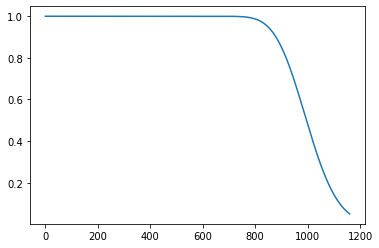

In [32]:
#График распределения
plt.plot(prob)
plt.show()

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Подсказка

Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.


In [33]:
# задаём параметры биномиального распределения
n = 1000000 #1 млн уведомлений
p = 0.4 #уведомления открывают около 40 % получивших клиентов
# зададим параметры нормального распределения равными мат.ожиданию и дисперсии биномиального распределения - это берется из цпт
mu = n * p
sigma = sqrt(n * p * (1 - p))
# задаём нормальное распределение
distr = st.norm(mu, sigma)  # моделируем исходное распределение
x1=399500 #уведомление откроют не более 399,5 тыс. пользователей
print('Вероятность, что уведомление откроют не более 399,5 тыс. пользователей:',  distr.cdf(x1) )
print('{:.0%}'.format(distr.cdf(x1)))

Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768
15%


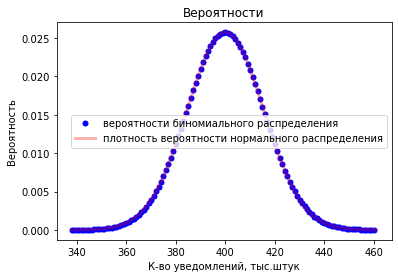

Условие аппроксимации выполняется


In [34]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000 #расчет в тысячах 000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятности биномиального распределения')

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из n чисел от left до right
x = linspace(left, right, n)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
#ax.set_xticks(x_ticks)
#plt.xticks(rotation=90) #текст вертикально
# настраиваем оптимальное расположение легенды и выводим график
ax.set_title('Вероятности')
ax.set_xlabel('К-во уведомлений, тыс.штук')
ax.set_ylabel('Вероятность')
ax.legend(loc='best')
#ax.figure(figsize=(15,10));
plt.show() #
# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется')
else:
    print('Условие аппроксимации не выполняется')


<div class="alert alert-block alert-info">
<b>🔄Вывод 1:</b> 
Все данные загружены, некоторые столбцы содержат дату как Object. 
</div>
<div class="alert alert-block alert-info">
<b>🔄Вывод 2:</b> 
Все данные загружены, типы столбцов преобразованы. Проверено наличие пропущенных значений (их нет) и дубликатов в датафреймах (31 дубликат найден и удален).
</div>
<div class="alert alert-block alert-info">
<b>🔄Вывод 3:</b>  
    
1) Самое маленькое количество пользователей сервиса в Москве, видимо, из-за конкурентов.  
    
2) 54% пользователей - без подписки (free).  

3) Распределение возрастов -"нормальное". Пик на графике практически совпадает с медианой - 25 лет.
    
4) Дистанции, которые пользователь преодолел за 1 поездку, имеют 2 максимума -в малом и среднем диапазоне (видимо, слишком разные по масштабам города попали в исследование). Медиана 3070 м на графике практически совпадает с пиком в среднем диапазоне. 
    
5) Продолжительность поездок имеет всплеск (выброс) около 0 минут, видимо, связанный с техническими неисправностями самоката СРАЗУ при начале движения. Медиана (17 минут) на графике практически совпадает с пиком в среднем диапазоне.
</div>
<div class="alert alert-block alert-info">
<b>🔄Вывод 4:</b>  
    
1) Объединили данные о пользователях, поездках и подписках в один датафрейм. 

2) Создайли ещё два датафрейма из датафрейма, созданного на этапе 1: c данными о пользователях без подписки и с данными о пользователях с подпиской.  
    
3) Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий. **Видно, что пользователи без подписки ездят в среднем на бОльшие расстояния.**
</div>
<div class="alert alert-block alert-info">
<b>🔄Вывод 5:</b>  
    
Рассчитали столбец с помесячной выручкой, которую принёс каждый пользователь для подписчиков и тех, у кого нет подписки
</div>
<div class="alert alert-block alert-info">
<b>🔄Выводы 6:</b>  
    1. Доказали, что пользователи с подпиской тратят меньше или столько же времени на поездки.  
    2. Доказали, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров  
    3. Доказали, что помесячная выручка от пользователей с подпиской по месяцам ниже или равна выручке от пользователей без подписки  
    4. Для сравнения количества обращений до и после обновления серверов понадобился бы st.ttest_rel  
</div>


Итоговый вывод:
Статистические исследования проведены, задания выполнены.